## Reddit r/worldnews: Modeling Results

In [15]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import re, itertools, random, string, unicodedata
import importlib

import gensim
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder
from sklearn.compose import make_column_transformer,ColumnTransformer

from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer 
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from scipy.spatial.distance import cdist
from sklearn.metrics import f1_score,precision_score,recall_score,confusion_matrix

import imblearn
from imblearn.under_sampling import RandomUnderSampler

import warnings
warnings.filterwarnings('ignore')

In [157]:
# Import full comment df
comments_final = pd.read_pickle("data/comments_final_.pkl")

### Train-test-split
I first conduct a stratified train-test-split (80%-20%) on the comment data and comment removal indicator.

In [3]:
y = comments_final['Removed'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(comments_final,y, test_size = 0.2, random_state = 0, stratify = y)

X_train.reset_index(inplace=True)
X_test.reset_index(inplace=True)

In [4]:
# Remove df to save space
del comments_final

### Modeling Framework
I use stratified k-fold cross validation on my training data for all models and F1, precision, and recall to evaluate model performance. I first converted my comment data into term frequency-inverse document frequency (tf-idf) matrices for my logistic regression, random forest, and gradient boosting models. I then compared performance using these models to performance with the addition of nontextual features. For all models, I compare performance using unigrams vs. bigrams, and no undersampling vs. sampling.

### Text Features Only

I first investigate the effect of purely textual features, using tf-idf methods.

#### Unigrams & No Undersampling

In [220]:
# Import modeling functions
from src.models_tfidf import *

In [116]:
# Unigrams & No Undersampling

# Baseline model
d_base, base_model = cross_val_scores_freq(X_train, y_train, 5, DummyClassifier(strategy="stratified"),1)

# Logistic Regression
d_lr, base_lr = cross_val_scores_freq(X_train, y_train, 5, LogisticRegression(random_state=0),1)

# Random Forest
d_rf, base_rf = cross_val_scores_freq(X_train, y_train, 5, RandomForestClassifier(n_estimators=5, random_state=0),1)

# Gradient Boosting
d_gb, base_gb = cross_val_scores_freq(X_train, y_train, 5, GradientBoostingClassifier(n_estimators=5, random_state=0),1)

In [289]:
# weighted average F1 scores
f1_base = d_base['f1_w']
f1_lr = d_lr['f1_w']
f1_rf = d_rf['f1_w']
f1_gb = d_gb['f1_w']

print(f'Weighted Average F1 Scores: Unigrams & No Undersampling')
print(f'Baseline: {f1_base:.4f}')
print(f'Logistic Regression: {f1_lr:.4f}')
print(f'Random Forest: {f1_rf:.4f}')
print(f'Gradient Boosting: {f1_gb:.4f}')


Weighted Average F1 Scores: Unigrams & No Undersampling
Baseline: 0.9405
Logistic Regression: 0.9586
Random Forest: 0.9593
Gradient Boosting: 0.9543


In [290]:
# weighted average precision scores
prec_base = d_base['precision_w']
prec_lr = d_lr['precision_w']
prec_rf = d_rf['precision_w']
prec_gb = d_gb['precision_w']

print(f'Weighted Average Precision Scores: Unigrams & No Undersampling')
print(f'Baseline: {prec_base:.4f}')
print(f'Logistic Regression: {prec_lr:.4f}')
print(f'Random Forest: {prec_rf:.4f}')
print(f'Gradient Boosting: {prec_gb:.4f}')

Weighted Average Precision Scores: Unigrams & No Undersampling
Baseline: 0.9404
Logistic Regression: 0.9623
Random Forest: 0.9560
Gradient Boosting: 0.9658


In [291]:
recall_base = d_base['recall_w']
recall_lr = d_lr['recall_w']
recall_rf = d_rf['recall_w']
recall_gb = d_gb['recall_w']

print(f'Weighted Average Recall Scores: Unigrams & No Undersampling')
print(f'Baseline: {recall_base:.4f}')
print(f'Logistic Regression: {recall_lr:.4f}')
print(f'Random Forest: {recall_rf:.4f}')
print(f'Gradient Boosting: {recall_gb:.4f}')

Weighted Average Recall Scores: Unigrams & No Undersampling
Baseline: 0.9406
Logistic Regression: 0.9704
Random Forest: 0.9680
Gradient Boosting: 0.9693


In [292]:
# F1 scores for the positive class (removed comments)

f1_base_pos = d_base['f1_pos']
f1_lr_pos = d_lr['f1_pos']
f1_rf_pos = d_rf['f1_pos']
f1_gb_pos = d_gb['f1_pos']

print(f'F1 Scores (Positive Class): Unigrams & No Undersampling')
print(f'Baseline: {f1_base_pos:.4f}')
print(f'Logistic Regression: {f1_lr_pos:.4f}')
print(f'Random Forest: {f1_rf_pos:.4f}')
print(f'Gradient Boosting: {f1_gb_pos:.4f}')


F1 Scores (Positive Class): Unigrams & No Undersampling
Baseline: 0.0284
Logistic Regression: 0.1251
Random Forest: 0.1888
Gradient Boosting: 0.0020


In [293]:
f1_list = [f1_base, f1_lr, f1_rf, f1_gb]
precision_list = [precision_base, precision_lr, precision_rf, precision_gb]
recall_list = [recall_base, recall_lr, recall_rf, recall_gb]

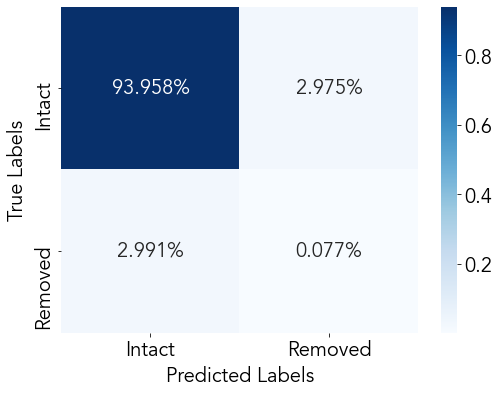

In [224]:
predicted = base_model.predict(X_test)
plot_confusion_matrix(y_test, predicted)

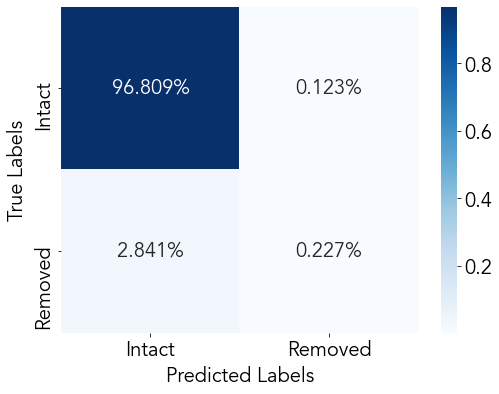

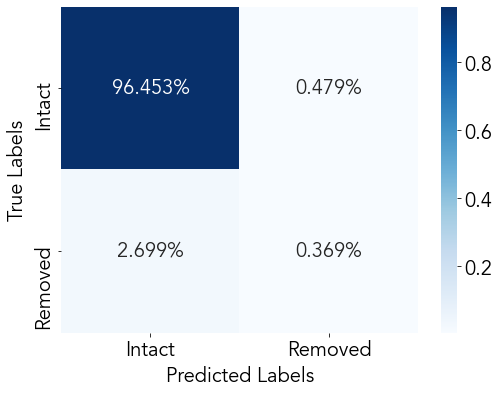

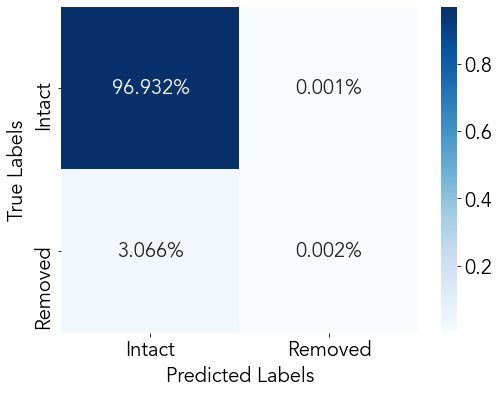

In [191]:
# Predictions
lr_predicted = base_lr.predict(x_test)
rf_predicted = base_rf.predict(x_test)
gb_predicted = base_gb.predict(x_test)

# Confusion matrices
plot_confusion_matrix(y_test, predicted)
plot_confusion_matrix(y_test, lr_predicted)
plot_confusion_matrix(y_test, rf_predicted)
plot_confusion_matrix(y_test, gb_predicted)

#### Unigrams & Undersampling
I then try out an undersampling approach, where I randomly remove samples from the target majority ("intact comments") class until the class distribution becomes equal.

In [30]:
# Unigrams & Undersampling

# Baseline model
d_base_u,base_model_u = cross_val_scores_freq(X_train, y_train, 5, DummyClassifier(strategy="stratified"),1,undersampling=True)

# Logistic Regression
d_base_lr_u,base_lr_u = cross_val_scores_freq(X_train, y_train, 5, LogisticRegression(random_state=0),1,undersampling=True)

# Random Forest
d_base_rf_u,base_rf_u = cross_val_scores_freq(X_train, y_train, 5, RandomForestClassifier(n_estimators=5,random_state=0),1,undersampling=True)

# Gradient Boosting
d_base_gb_u,base_gb_u = cross_val_scores_freq(X_train, y_train, 5, GradientBoostingClassifier(n_estimators=5,random_state=0),1,undersampling=True)


In [284]:
# weighted average F1 scores
f1_base_u = d_base_u['f1_w']
f1_lr_u = d_base_lr_u['f1_w']
f1_rf_u = d_base_rf_u['f1_w']
f1_gb_u = d_base_gb_u['f1_w']

print(f'Weighted Average F1 Scores: Unigrams & Undersampling')
print(f'Baseline: {f1_base_u:.4f}')
print(f'Logistic Regression: {f1_lr_u:.4f}')
print(f'Random Forest: {f1_rf_u:.4f}')
print(f'Gradient Boosting: {f1_gb_u:.4f}')


Weighted Average F1 Scores: Unigrams & Undersampling
Baseline: 0.6406
Logistic Regression: 0.8351
Random Forest: 0.7628
Gradient Boosting: 0.9385


In [285]:
# weighted average precision scores
precision_base_u = d_base_u['precision_w']
precision_lr_u = d_base_lr_u['precision_w']
precision_rf_u = d_base_rf_u['precision_w']
precision_gb_u = d_base_gb_u['precision_w']

print(f'Weighted Average Precision Scores: Unigrams & Undersampling')
print(f'Baseline: {precision_base_u:.4f}')
print(f'Logistic Regression: {precision_lr_u:.4f}')
print(f'Random Forest: {precision_rf_u:.4f}')
print(f'Gradient Boosting: {precision_gb_u:.4f}')


Weighted Average Precision Scores: Unigrams & Undersampling
Baseline: 0.9404
Logistic Regression: 0.9578
Random Forest: 0.9544
Gradient Boosting: 0.9477


In [286]:
# weighted average recall scores
recall_base_u = d_base_u['recall_w']
recall_lr_u = d_base_lr_u['recall_w']
recall_rf_u = d_base_rf_u['recall_w']
recall_gb_u = d_base_gb_u['recall_w']

print(f'Weighted Average Recall Scores: Unigrams & Undersampling')
print(f'Baseline: {recall_base_u:.4f}')
print(f'Logistic Regression: {recall_lr_u:.4f}')
print(f'Random Forest: {recall_rf_u:.4f}')
print(f'Gradient Boosting: {recall_gb_u:.4f}')

Weighted Average Recall Scores: Unigrams & Undersampling
Baseline: 0.4992
Logistic Regression: 0.7548
Random Forest: 0.6514
Gradient Boosting: 0.9301


In [287]:
# F1 scores for positive class
f1_base_u_pos = d_base_u['f1_pos']
f1_lr_u_pos = d_base_lr_u['f1_pos']
f1_rf_u_pos = d_base_rf_u['f1_pos']
f1_gb_u_pos = d_base_gb_u['f1_pos']

print(f'F1 Scores for Positive Class: Bigrams & No Undersampling')
print(f'Baseline: {f1_base_u_pos:.4f}')
print(f'Logistic Regression: {f1_lr_u_pos:.4f}')
print(f'Random Forest: {f1_rf_u_pos:.4f}')
print(f'Gradient Boosting: {f1_gb_u_pos:.4f}')

F1 Scores for Positive Class: Bigrams & No Undersampling
Baseline: 0.0576
Logistic Regression: 0.1398
Random Forest: 0.1013
Gradient Boosting: 0.1465


In [288]:
f1_list_u = [f1_base_u, f1_lr_u, f1_rf_u, f1_gb_u]
precision_list_u = [precision_base_u, precision_lr_u, precision_rf_u, precision_gb_u]
recall_list_u = [recall_base_u, recall_lr_u, recall_rf_u, recall_gb_u]

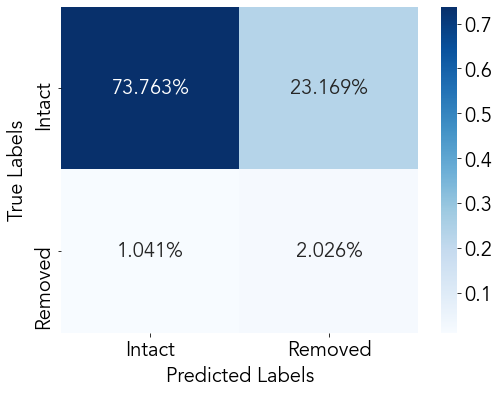

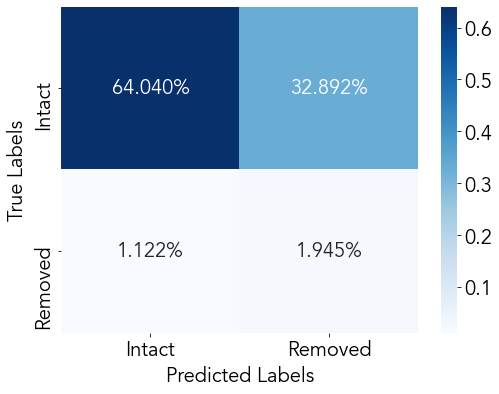

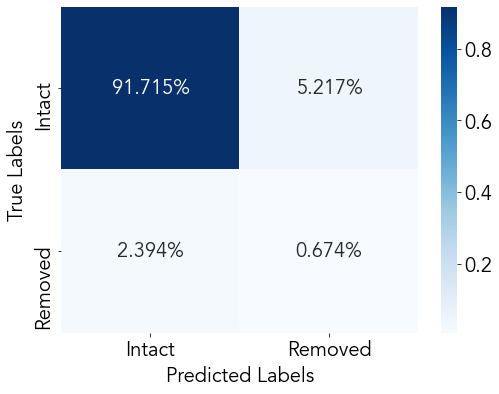

In [197]:
# Predictions
lr_predicted_u = base_lr_u.predict(x_test)
rf_predicted_u = base_rf_u.predict(x_test)
gb_predicted_u = base_gb_u.predict(x_test)

# Confusion matrices
plot_confusion_matrix(y_test, lr_predicted_u)
plot_confusion_matrix(y_test, rf_predicted_u)
plot_confusion_matrix(y_test, gb_predicted_u)

#### Bigrams & No Undersampling
I next experiment with bigrams (word pairings) instead of single words. 

In [21]:
# Bigrams

# Baseline model
d_base_bi,base_model_bi = cross_val_scores_freq(X_train, y_train, 5, DummyClassifier(strategy="stratified", random_state=0), 2)

# Logistic Regression
d_lr_bi,base_model_lr = cross_val_scores_freq(X_train, y_train, 5, LogisticRegression(random_state=0), 2)

# Random Forest
d_rf_bi,base_model_rf = cross_val_scores_freq(X_train, y_train, 5, RandomForestClassifier(n_estimators=5, random_state=0), 2)

# Gradient Boosting
d_gb_bi,base_model_gb = cross_val_scores_freq(X_train, y_train, 5, GradientBoostingClassifier(n_estimators=5, random_state=0), 2)

In [239]:
# weighted average F1 scores
f1_base_bi = d_base_bi['f1_w']
f1_lr_bi = d_lr_bi['f1_w']
f1_rf_bi = d_rf_bi['f1_w']
f1_gb_bi = d_gb_bi['f1_w']

print(f'Weighted Average F1 Scores: Bigrams & No Undersampling')
print(f'Baseline: {f1_base_bi:.4f}')
print(f'Logistic Regression: {f1_lr_bi:.4f}')
print(f'Random Forest: {f1_rf_bi:.4f}')
print(f'Gradient Boosting: {f1_gb_bi:.4f}')


Weighted Average F1 Scores: Bigrams & No Undersampling
Baseline: 0.9406
Logistic Regression: 0.9583
Random Forest: 0.9601
Gradient Boosting: 0.9544


In [240]:
# weighted average precision scores
precision_base_bi = d_base_bi['precision_w']
precision_lr_bi = d_lr_bi['precision_w']
precision_rf_bi = d_rf_bi['precision_w']
precision_gb_bi = d_gb_bi['precision_w']

print(f'Weighted Average Precision Scores: Bigrams & No Undersampling')
print(f'Baseline: {precision_base_bi:.4f}')
print(f'Logistic Regression: {precision_lr_bi:.4f}')
print(f'Random Forest: {precision_rf_bi:.4f}')
print(f'Gradient Boosting: {precision_gb_bi:.4f}')


Weighted Average Precision Scores: Bigrams & No Undersampling
Baseline: 0.9406
Logistic Regression: 0.9624
Random Forest: 0.9576
Gradient Boosting: 0.9656


In [341]:
# weighted average recall scores
recall_base_bi = d_base_bi['recall_w']
recall_lr_bi = d_lr_bi['recall_w']
recall_rf_bi = d_rf_bi['recall_w']
recall_gb_bi = d_gb_bi['recall_w']

print(f'Weighted Average Recall Scores: Bigrams & No Undersampling')
print(f'Baseline: {recall_base_bi:.4f}')
print(f'Logistic Regression: {recall_lr_bi:.4f}')
print(f'Random Forest: {recall_rf_bi:.4f}')
print(f'Gradient Boosting: {recall_gb_bi:.4f}')


Weighted Average Recall Scores: Bigrams & No Undersampling
Baseline: 0.9406
Logistic Regression: 0.9704
Random Forest: 0.9688
Gradient Boosting: 0.9694


In [242]:
# F1 scores for positive class
f1_base_bi_pos = d_base_bi['f1_pos']
f1_lr_bi_pos = d_lr_bi['f1_pos']
f1_rf_bi_pos = d_rf_bi['f1_pos']
f1_gb_bi_pos = d_gb_bi['f1_pos']

print(f'F1 Scores for Positive Class: Bigrams & No Undersampling')
print(f'Baseline: {f1_base_bi_pos:.4f}')
print(f'Logistic Regression: {f1_lr_bi_pos:.4f}')
print(f'Random Forest: {f1_rf_bi_pos:.4f}')
print(f'Gradient Boosting: {f1_gb_bi_pos:.4f}')

F1 Scores for Positive Class: Bigrams & No Undersampling
Baseline: 0.0317
Logistic Regression: 0.1173
Random Forest: 0.2006
Gradient Boosting: 0.0063


In [276]:
f1_list_bi = [f1_base_bi, f1_lr_bi, f1_rf_bi, f1_gb_bi]
precision_list_bi = [precision_base_bi, precision_lr_bi, precision_rf_bi, precision_gb_bi]
recall_list_bi = [recall_base_bi, recall_lr_bi, recall_rf_bi, recall_gb_bi]

In [59]:
print(f'F1 Scores: Bigrams & No Undersampling')
print(f'Baseline: {f1_score_bi:.4f}')
print(f'Logistic Regression: {f1_score_lr_bi:.4f}')
print(f'Random Forest: {f1_score_rf_bi:.4f}')
print(f'Gradient Boosting: {f1_score_gb_bi:.4f}')
print(f'Naive-Bayes: {f1_score_nb_bi:.4f}')

F1 Scores: Bigrams & No Undersampling
Baseline: 0.0294
Logistic Regression: 0.1178
Random Forest: 0.2027
Gradient Boosting: 0.0163
Naive-Bayes: 0.0652


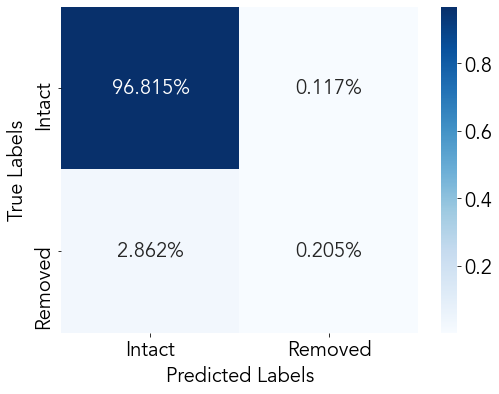

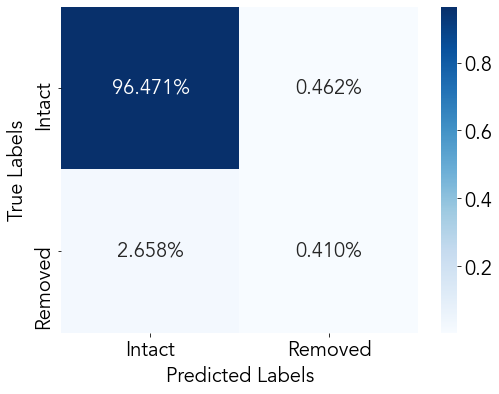

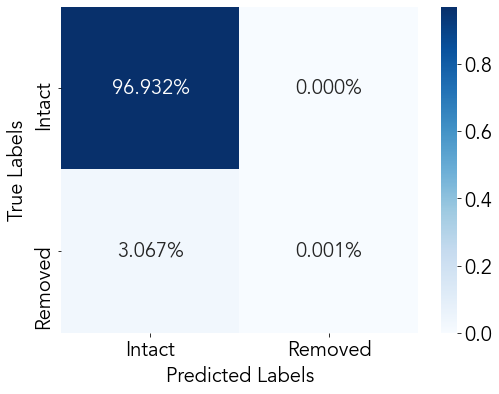

In [202]:
# Predictions
lr_predicted_bi = base_lr_bi.predict(x_test)
rf_predicted_bi = base_rf_bi.predict(x_test)
gb_predicted_bi = base_gb_bi.predict(x_test)

# Confusion matrices
plot_confusion_matrix(y_test, lr_predicted_bi)
plot_confusion_matrix(y_test, rf_predicted_bi)
plot_confusion_matrix(y_test, gb_predicted_bi)

#### Bigrams & Undersampling
Lastly, I look at the effect of using both bigrams and undersampling.

In [31]:
# Bigrams & Undersampling

# Baseline model
d_base_bi_u,base_bi_u = cross_val_scores_freq(X_train, y_train, 5, DummyClassifier(strategy="stratified", random_state=0), 2, undersampling=True)

# Logistic Regression
d_lr_bi_u,base_lr_bi_u = cross_val_scores_freq(X_train, y_train, 5, LogisticRegression(random_state=0), 2, undersampling=True)

# Random Forest
d_rf_bi_u,base_rf_bi_u = cross_val_scores_freq(X_train, y_train, 5, RandomForestClassifier(n_estimators=5, random_state=0), 2, undersampling=True)

# Gradient Boosting
d_gb_bi_u,base_gb_bi_u = cross_val_scores_freq(X_train, y_train, 5, GradientBoostingClassifier(n_estimators=5, random_state=0), 2, undersampling=True)


In [245]:
# weighted average F1 scores
f1_base_bi_u = d_base_bi_u['f1_w']
f1_lr_bi_u = d_lr_bi_u['f1_w']
f1_rf_bi_u = d_rf_bi_u['f1_w']
f1_gb_bi_u = d_gb_bi_u['f1_w']

print(f'Weighted Average F1 Scores: Bigrams & Undersampling')
print(f'Baseline: {f1_base_bi_u:.4f}')
print(f'Logistic Regression: {f1_lr_bi_u:.4f}')
print(f'Random Forest: {f1_rf_bi_u:.4f}')
print(f'Gradient Boosting: {f1_gb_bi_u:.4f}')

Weighted Average F1 Scores: Bigrams & Undersampling
Baseline: 0.6415
Logistic Regression: 0.8274
Random Forest: 0.7535
Gradient Boosting: 0.9371


In [246]:
# weighted average Precision scores
precision_base_bi_u = d_base_bi_u['precision_w']
precision_lr_bi_u = d_lr_bi_u['precision_w']
precision_rf_bi_u = d_rf_bi_u['precision_w']
precision_gb_bi_u = d_gb_bi_u['precision_w']

print(f'Weighted Average Precision Scores: Bigrams & Undersampling')
print(f'Baseline: {precision_base_bi_u:.4f}')
print(f'Logistic Regression: {precision_lr_bi_u:.4f}')
print(f'Random Forest: {precision_rf_bi_u:.4f}')
print(f'Gradient Boosting: {precision_gb_bi_u:.4f}')

Weighted Average Precision Scores: Bigrams & Undersampling
Baseline: 0.9404
Logistic Regression: 0.9581
Random Forest: 0.9531
Gradient Boosting: 0.9475


In [247]:
# weighted average Recall scores
recall_base_bi_u = d_base_bi_u['recall_w']
recall_lr_bi_u = d_lr_bi_u['recall_w']
recall_rf_bi_u = d_rf_bi_u['recall_w']
recall_gb_bi_u = d_gb_bi_u['recall_w']

print(f'Weighted Average Recall Scores: Bigrams & No Undersampling')
print(f'Baseline: {recall_base_bi_u:.4f}')
print(f'Logistic Regression: {recall_lr_bi_u:.4f}')
print(f'Random Forest: {recall_rf_bi_u:.4f}')
print(f'Gradient Boosting: {recall_gb_bi_u:.4f}')

Weighted Average Recall Scores: Bigrams & No Undersampling
Baseline: 0.5002
Logistic Regression: 0.7433
Random Forest: 0.6389
Gradient Boosting: 0.9277


In [248]:
# F1 scores for positive class
f1_base_bi_u_pos = d_base_bi_u['f1_pos']
f1_lr_bi_u_pos = d_lr_bi_u['f1_pos']
f1_rf_bi_u_pos = d_rf_bi_u['f1_pos']
f1_gb_bi_u_pos = d_gb_bi_u['f1_pos']

print(f'F1 Scores for Positive Class: Bigrams & No Undersampling')
print(f'Baseline: {f1_base_bi_u_pos:.4f}')
print(f'Logistic Regression: {f1_lr_bi_u_pos:.4f}')
print(f'Random Forest: {f1_rf_bi_u_pos:.4f}')
print(f'Gradient Boosting: {f1_gb_bi_u_pos:.4f}')

F1 Scores for Positive Class: Bigrams & No Undersampling
Baseline: 0.0575
Logistic Regression: 0.1373
Random Forest: 0.0955
Gradient Boosting: 0.1431


In [275]:
f1_list_bi_u = [f1_base_bi_u, f1_lr_bi_u, f1_rf_bi_u, f1_gb_bi_u]
precision_list_bi_u = [precision_base_bi_u, precision_lr_bi_u, precision_rf_bi_u, precision_gb_bi_u]
recall_list_bi_u = [recall_base_bi_u, recall_lr_bi_u, recall_rf_bi_u, recall_gb_bi_u]

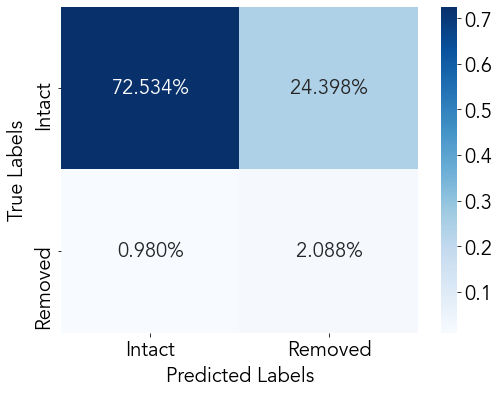

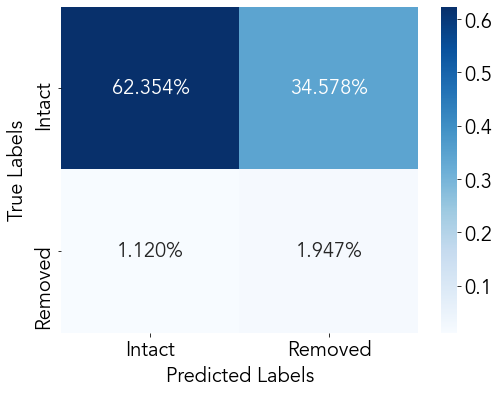

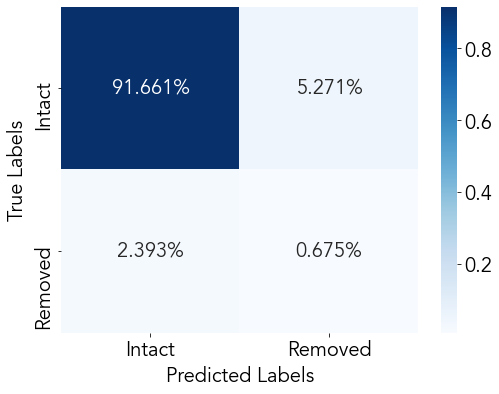

In [200]:
# Predictions
lr_predicted_bi_u = base_lr_bi_u.predict(x_test)
rf_predicted_bi_u = base_rf_bi_u.predict(x_test)
gb_predicted_bi_u = base_gb_bi_u.predict(x_test)

# Confusion matrices
plot_confusion_matrix(y_test, lr_predicted_bi_u)
plot_confusion_matrix(y_test, rf_predicted_bi_u)
plot_confusion_matrix(y_test, gb_predicted_bi_u)

### Modeling Results: Text Features Only

As we see above, the model that yields the highest weighted F1 score is Random Forest using bigrams and no undersampling, with an F1 score of 0.9601, precision of 0.9576, and recall of 0.9688. The F1 score for the positive (removed comments) class is 0.2006.

In [339]:
# Plot modeling results
plt.style.use('classic')
from matplotlib.font_manager import FontProperties
def plot_results(barwidth, f1_list, precision_list, recall_list, title):
    
    barwidth = barwidth

    r1 = np.arange(len(f1_list))
    r2 = [x + barwidth for x in r1]
    r3 = [x + barwidth for x in r2]
    
    fig,ax = plt.subplots(figsize=(7,5))
    ax.bar(r1, f1_list, color='midnightblue', width=barwidth, edgecolor='white', label='Weighted F1 Score')
    ax.bar(r2, precision_list, color='tomato', width=barwidth, edgecolor='white', label='Weighted Precision')
    ax.bar(r3, recall_list, color='gold', width=barwidth, edgecolor='white', label='Weighted Recall')

    plt.xticks([r + barwidth for r in range(len(f1_list))], ['Baseline', 'Logistic\nRegression', 'Random\nForest', 'Gradient\nBoosting'])
    plt.ylim(0,1.4)
    plt.legend()
    fontP = FontProperties()
    legend = plt.legend(loc=0, ncol=1, bbox_to_anchor=(0, 0, 1, 1),prop=fontP,fancybox=True,shadow=False,edgecolor='white')

    plt.setp(legend.get_title(),fontsize='xx-small')
    plt.title(title)
    
#     plt.legend()
    plt.savefig(f'imgs/{title}.png')
    plt.show()


Weighted F1, precision, and recall scores for all models and approaches are graphed below. For the no undersampling approach, we see high scores all around, but for the undersampling approach, we see higher average precision and lower recall. 

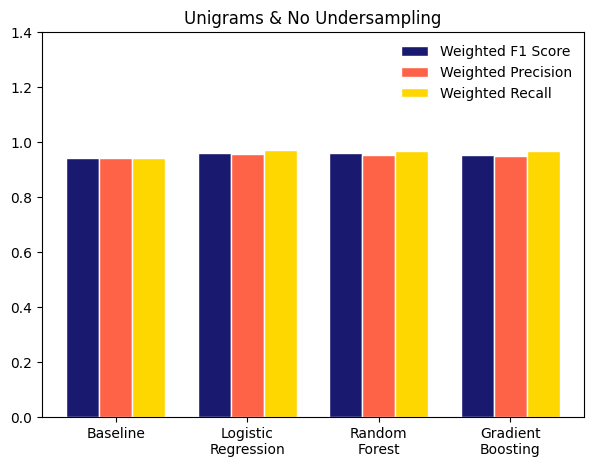

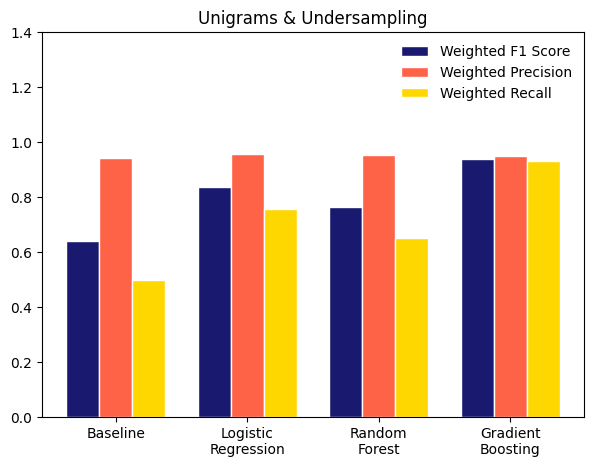

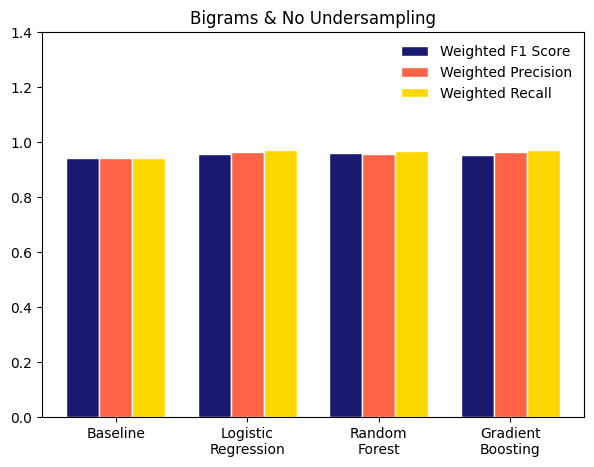

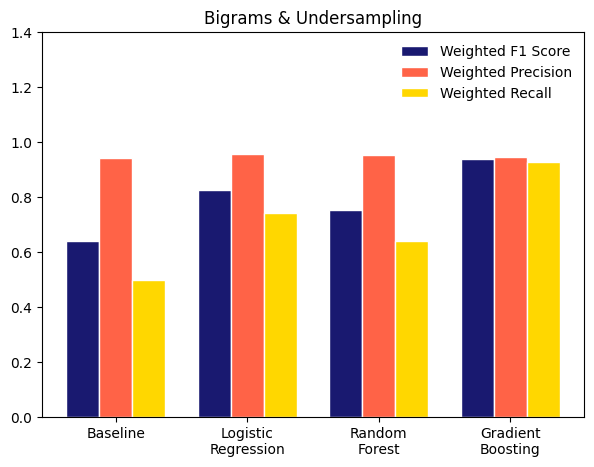

In [353]:
plot_results(0.25, f1_list, precision_list, recall_list, "Unigrams & No Undersampling")
plot_results(0.25, f1_list_u, precision_list_u, recall_list_u, "Unigrams & Undersampling")
plot_results(0.25, f1_list_bi, precision_list_bi, recall_list_bi, "Bigrams & No Undersampling")
plot_results(0.25, f1_list_bi_u, precision_list_bi_u, recall_list_bi_u, "Bigrams & Undersampling")



### Non-text & Text Features
Next we take incorporate non-textual features into our model. These include flags for the first- through fifth-level child responses of removed parent comments; and the previous proportion and count of removed and total comments per user and posting date.

#### Unigrams & No Undersampling

In [59]:
# Unigrams & No Undersampling

# Baseline model
d_base_nontext,base_nontext = cross_val_scores_freq(X_train, y_train, 5, DummyClassifier(strategy="stratified"),1,nontext=True)

# Logistic Regression
d_lr_nontext,base_lr_nontext = cross_val_scores_freq(X_train, y_train, 5, LogisticRegression(random_state=0),1,nontext=True)

# Random Forest
d_rf_nontext,base_rf_nontext = cross_val_scores_freq(X_train, y_train, 5, RandomForestClassifier(n_estimators=5, random_state=0),1,nontext=True)

# Gradient Boosting
d_gb_nontext,base_gb_nontext = cross_val_scores_freq(X_train, y_train, 5, GradientBoostingClassifier(n_estimators=5, random_state=0),1,nontext=True)


In [355]:
# weighted average F1 scores
f1_base_nontext = d_base_nontext['f1_w']
f1_lr_nontext = d_lr_nontext['f1_w']
f1_rf_nontext = d_rf_nontext['f1_w']
f1_gb_nontext = d_gb_nontext['f1_w']

print(f'Weighted Average F1 Scores Nontext: Unigrams & No Undersampling')
print(f'Baseline: {f1_base_nontext:.4f}')
print(f'Logistic Regression: {f1_lr_nontext:.4f}')
print(f'Random Forest: {f1_rf_nontext:.4f}')
print(f'Gradient Boosting: {f1_gb_nontext:.4f}')

Weighted Average F1 Scores Nontext: Unigrams & No Undersampling
Baseline: 0.9407
Logistic Regression: 0.9711
Random Forest: 0.9699
Gradient Boosting: 0.9650


In [258]:
# weighted average precision scores
precision_base_nontext = d_base_nontext['precision_w']
precision_lr_nontext = d_lr_nontext['precision_w']
precision_rf_nontext = d_rf_nontext['precision_w']
precision_gb_nontext = d_gb_nontext['precision_w']

print(f'Weighted Average precision Scores Nontext: Unigrams & No Undersampling')
print(f'Baseline: {precision_base_nontext:.4f}')
print(f'Logistic Regression: {precision_lr_nontext:.4f}')
print(f'Random Forest: {precision_rf_nontext:.4f}')
print(f'Gradient Boosting: {precision_gb_nontext:.4f}')

Weighted Average precision Scores Nontext: Unigrams & No Undersampling
Baseline: 0.9406
Logistic Regression: 0.9722
Random Forest: 0.9693
Gradient Boosting: 0.9726


In [259]:
# weighted average recall scores
recall_base_nontext = d_base_nontext['recall_w']
recall_lr_nontext = d_lr_nontext['recall_w']
recall_rf_nontext = d_rf_nontext['recall_w']
recall_gb_nontext = d_gb_nontext['recall_w']

print(f'Weighted Average recall Scores Nontext: Unigrams & No Undersampling')
print(f'Baseline: {recall_base_nontext:.4f}')
print(f'Logistic Regression: {recall_lr_nontext:.4f}')
print(f'Random Forest: {recall_rf_nontext:.4f}')
print(f'Gradient Boosting: {recall_gb_nontext:.4f}')

Weighted Average recall Scores Nontext: Unigrams & No Undersampling
Baseline: 0.9407
Logistic Regression: 0.9760
Random Forest: 0.9742
Gradient Boosting: 0.9739


In [354]:
# F1 scores for the positive class
f1_base_nontext = d_base_nontext['f1_pos']
f1_lr_nontext = d_lr_nontext['f1_pos']
f1_rf_nontext = d_rf_nontext['f1_pos']
f1_gb_nontext = d_gb_nontext['f1_pos']

print(f'F1 Scores for the Positive Class: Unigrams & No Undersampling')
print(f'Baseline: {f1_base_nontext:.4f}')
print(f'Logistic Regression: {f1_lr_nontext:.4f}')
print(f'Random Forest: {f1_rf_nontext:.4f}')
print(f'Gradient Boosting: {f1_gb_nontext:.4f}')

F1 Scores for the Positive Class: Unigrams & No Undersampling
Baseline: 0.0324
Logistic Regression: 0.4442
Random Forest: 0.4376
Gradient Boosting: 0.2792


In [356]:
f1_list_nontext = [f1_base_nontext, f1_lr_nontext, f1_rf_nontext, f1_gb_nontext]
precision_list_nontext = [precision_base_nontext, precision_lr_nontext, precision_rf_nontext, precision_gb_nontext]
recall_list_nontext = [recall_base_nontext, recall_lr_nontext, recall_rf_nontext, recall_gb_nontext]

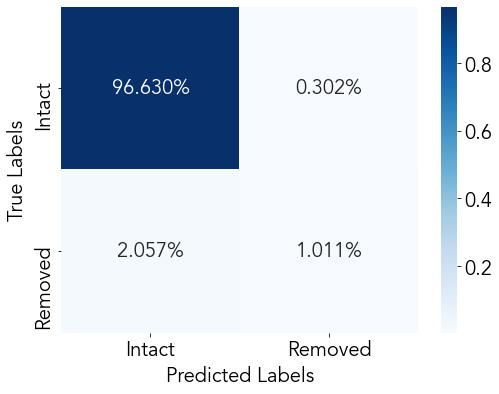

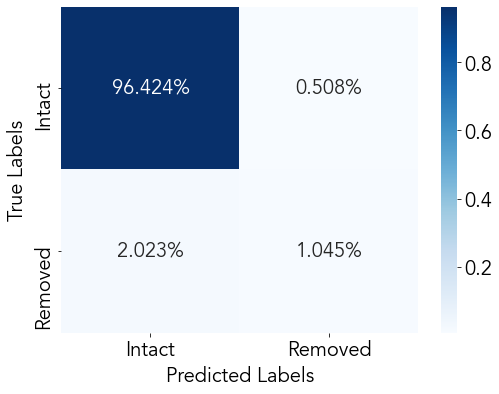

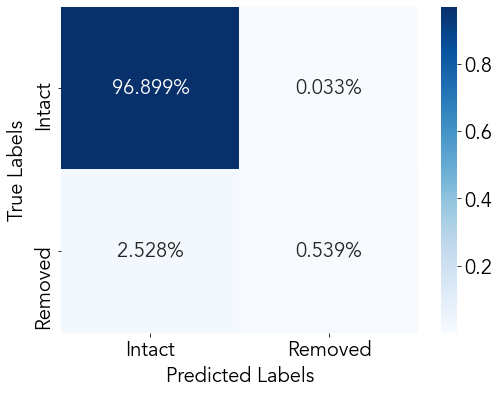

In [207]:
# Predictions
lr_predicted_nontext = base_lr_nontext.predict(x_test)
rf_predicted_nontext = base_rf_nontext.predict(x_test)
gb_predicted_nontext = base_gb_nontext.predict(x_test)

# Confusion matrices
plot_confusion_matrix(y_test, lr_predicted_nontext)
plot_confusion_matrix(y_test, rf_predicted_nontext)
plot_confusion_matrix(y_test, gb_predicted_nontext)

#### Unigrams & Undersampling

In [61]:
# Unigrams & No Undersampling

# Baseline model
d_base_nontext_u,base_nontext_u = cross_val_scores_freq(X_train, y_train, 5, DummyClassifier(strategy="stratified"),1,nontext=True,undersampling=True)

# Logistic Regression
d_lr_nontext_u,base_nontext_lr_u = cross_val_scores_freq(X_train, y_train, 5, LogisticRegression(random_state=0),1,nontext=True,undersampling=True)

# Random Forest
d_rf_nontext_u,base_nontext_rf_u = cross_val_scores_freq(X_train, y_train, 5, RandomForestClassifier(n_estimators=5, random_state=0),1,nontext=True,undersampling=True)

# Gradient Boosting
d_gb_nontext_u,base_nontext_gb_u = cross_val_scores_freq(X_train, y_train, 5, GradientBoostingClassifier(n_estimators=5, random_state=0),1,nontext=True,undersampling=True)


In [253]:
# weighted average F1 scores
f1_base_nontext_u = d_base_nontext_u['f1_w']
f1_lr_nontext_u = d_lr_nontext_u['f1_w']
f1_rf_nontext_u = d_rf_nontext_u['f1_w']
f1_gb_nontext_u = d_gb_nontext_u['f1_w']

print(f'Weighted Average F1 Scores Nontext: Unigrams & Undersampling')
print(f'Baseline: {f1_base_nontext_u:.4f}')
print(f'Logistic Regression: {f1_lr_nontext_u:.4f}')
print(f'Random Forest: {f1_rf_nontext_u:.4f}')
print(f'Gradient Boosting: {f1_gb_nontext_u:.4f}')

Weighted Average F1 Scores Nontext: Unigrams & Undersampling
Baseline: 0.6415
Logistic Regression: 0.9192
Random Forest: 0.8508
Gradient Boosting: 0.9360


In [261]:
# weighted average precision scores
precision_base_nontext_u = d_base_nontext_u['precision_w']
precision_lr_nontext_u = d_lr_nontext_u['precision_w']
precision_rf_nontext_u = d_rf_nontext_u['precision_w']
precision_gb_nontext_u = d_gb_nontext_u['precision_w']

print(f'Weighted Average precision Scores Nontext: Unigrams & Undersampling')
print(f'Baseline: {precision_base_nontext_u:.4f}')
print(f'Logistic Regression: {precision_lr_nontext_u:.4f}')
print(f'Random Forest: {precision_rf_nontext_u:.4f}')
print(f'Gradient Boosting: {precision_gb_nontext_u:.4f}')

Weighted Average precision Scores Nontext: Unigrams & Undersampling
Baseline: 0.9407
Logistic Regression: 0.9656
Random Forest: 0.9622
Gradient Boosting: 0.9596


In [262]:
# weighted average recall scores
recall_base_nontext_u = d_base_nontext_u['recall_w']
recall_lr_nontext_u = d_lr_nontext_u['recall_w']
recall_rf_nontext_u = d_rf_nontext_u['recall_w']
recall_gb_nontext_u = d_gb_nontext_u['recall_w']

print(f'Weighted Average recall Scores Nontext: Unigrams & Undersampling')
print(f'Baseline: {recall_base_nontext_u:.4f}')
print(f'Logistic Regression: {recall_lr_nontext_u:.4f}')
print(f'Random Forest: {recall_rf_nontext_u:.4f}')
print(f'Gradient Boosting: {recall_gb_nontext_u:.4f}')

Weighted Average recall Scores Nontext: Unigrams & Undersampling
Baseline: 0.5003
Logistic Regression: 0.8881
Random Forest: 0.7787
Gradient Boosting: 0.9184


In [ ]:
# F1 scores for the positive class
f1_base_nontext_u_pos = d_base_nontext_u['f1_pos']
f1_lr_nontext_u_pos = d_lr_nontext_u['f1_pos']
f1_rf_nontext_u_pos = d_rf_nontext_u['f1_pos']
f1_gb_nontext_u_pos = d_gb_nontext_u['f1_pos']

print(f'Weighted Average F1 Scores Nontext: Unigrams & Undersampling')
print(f'Baseline: {f1_base_nontext_u_pos:.4f}')
print(f'Logistic Regression: {f1_lr_nontext_u_pos:.4f}')
print(f'Random Forest: {f1_rf_nontext_u_pos:.4f}')
print(f'Gradient Boosting: {f1_gb_nontext_u_pos:.4f}')

In [344]:
f1_list_nontext_u = [f1_base_nontext_u, f1_lr_nontext_u, f1_rf_nontext_u, f1_gb_nontext_u]
precision_list_nontext_u = [precision_base_nontext_u, precision_lr_nontext_u, precision_rf_nontext_u, precision_gb_nontext_u]
recall_list_nontext_u = [recall_base_nontext_u, recall_lr_nontext_u, recall_rf_nontext_u, recall_gb_nontext_u]

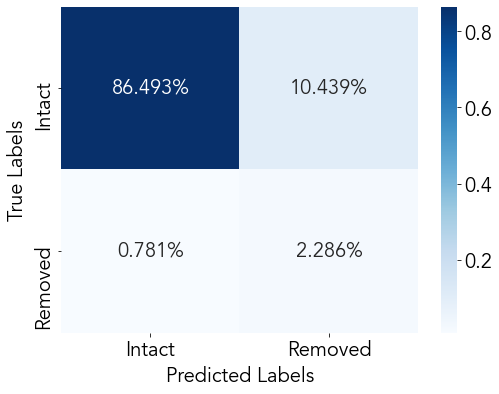

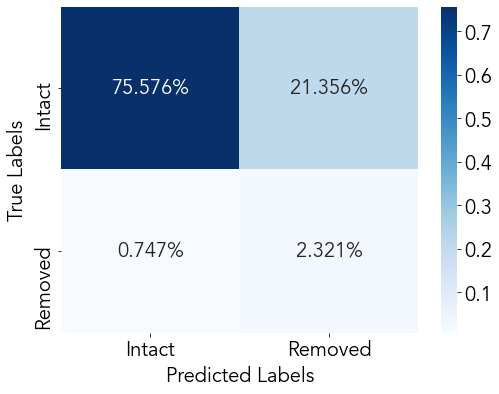

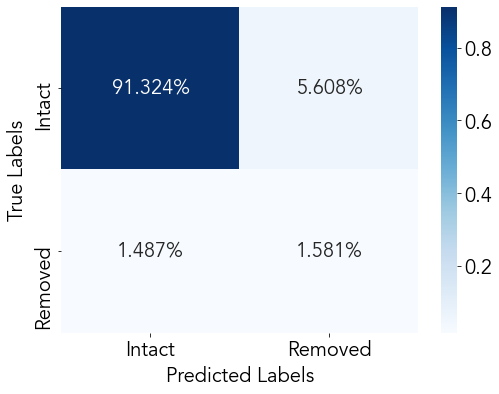

In [205]:
# Predictions
lr_predicted_nontext_u = base_lr_nontext_u.predict(x_test)
rf_predicted_nontext_u = base_rf_nontext_u.predict(x_test)
gb_predicted_nontext_u = base_gb_nontext_u.predict(x_test)

# Confusion matrices
plot_confusion_matrix(y_test, lr_predicted_nontext_u)
plot_confusion_matrix(y_test, rf_predicted_nontext_u)
plot_confusion_matrix(y_test, gb_predicted_nontext_u)

#### Bigrams & No Undersampling

In [63]:
# Bigrams & No Undersampling

# Baseline model
d_base_nontext_bi,base_nontext_bi = cross_val_scores_freq(X_train, y_train, 5, DummyClassifier(strategy="stratified"),2,nontext=True)

# Logistic Regression
d_lr_nontext_bi,base_lr_nontext_bi = cross_val_scores_freq(X_train, y_train, 5, LogisticRegression(random_state=0),2,nontext=True)

# Random Forest
d_rf_nontext_bi,base_rf_nontext_bi = cross_val_scores_freq(X_train, y_train, 5, RandomForestClassifier(n_estimators=5, random_state=0),2,nontext=True)

# Gradient Boosting
d_gb_nontext_bi,base_gb_nontext_bi = cross_val_scores_freq(X_train, y_train, 5, GradientBoostingClassifier(n_estimators=5, random_state=0),2,nontext=True)


In [264]:
# weighted average F1 scores
f1_base_nontext_bi = d_base_nontext_bi['f1_w']
f1_lr_nontext_bi = d_lr_nontext_bi['f1_w']
f1_rf_nontext_bi = d_rf_nontext_bi['f1_w']
f1_gb_nontext_bi = d_gb_nontext_bi['f1_w']

print(f'Weighted Average F1 Scores Nontext: Bigrams & No Undersampling')
print(f'Baseline: {f1_base_nontext_bi:.4f}')
print(f'Logistic Regression: {f1_lr_nontext_bi:.4f}')
print(f'Random Forest: {f1_rf_nontext_bi:.4f}')
print(f'Gradient Boosting: {f1_gb_nontext_bi:.4f}')

Weighted Average F1 Scores Nontext: Bigrams & No Undersampling
Baseline: 0.9405
Logistic Regression: 0.9709
Random Forest: 0.9698
Gradient Boosting: 0.9650


In [265]:
# weighted average precision scores
precision_base_nontext_bi = d_base_nontext_bi['precision_w']
precision_lr_nontext_bi = d_lr_nontext_bi['precision_w']
precision_rf_nontext_bi = d_rf_nontext_bi['precision_w']
precision_gb_nontext_bi = d_gb_nontext_bi['precision_w']

print(f'Weighted Average precision Scores Nontext: Bigrams & No Undersampling')
print(f'Baseline: {precision_base_nontext_bi:.4f}')
print(f'Logistic Regression: {precision_lr_nontext_bi:.4f}')
print(f'Random Forest: {precision_rf_nontext_bi:.4f}')
print(f'Gradient Boosting: {precision_gb_nontext_bi:.4f}')

Weighted Average precision Scores Nontext: Bigrams & No Undersampling
Baseline: 0.9406
Logistic Regression: 0.9721
Random Forest: 0.9698
Gradient Boosting: 0.9726


In [266]:
# weighted average recall scores
recall_base_nontext_bi = d_base_nontext_bi['recall_w']
recall_lr_nontext_bi = d_lr_nontext_bi['recall_w']
recall_rf_nontext_bi = d_rf_nontext_bi['recall_w']
recall_gb_nontext_bi = d_gb_nontext_bi['recall_w']

print(f'Weighted Average recall Scores Nontext: Bigrams & No Undersampling')
print(f'Baseline: {recall_base_nontext_bi:.4f}')
print(f'Logistic Regression: {recall_lr_nontext_bi:.4f}')
print(f'Random Forest: {recall_rf_nontext_bi:.4f}')
print(f'Gradient Boosting: {recall_gb_nontext_bi:.4f}')

Weighted Average recall Scores Nontext: Bigrams & No Undersampling
Baseline: 0.9403
Logistic Regression: 0.9759
Random Forest: 0.9746
Gradient Boosting: 0.9739


In [268]:
# F1 scores for the positive class
f1_base_nontext_bi_pos = d_base_nontext_bi['f1_pos']
f1_lr_nontext_bi_pos = d_lr_nontext_bi['f1_pos']
f1_rf_nontext_bi_pos = d_rf_nontext_bi['f1_pos']
f1_gb_nontext_bi_pos = d_gb_nontext_bi['f1_pos']

print(f'F1 Scores for the Positive Class Nontext: Bigrams & No Undersampling')
print(f'Baseline: {f1_base_nontext_bi_pos:.4f}')
print(f'Logistic Regression: {f1_lr_nontext_bi_pos:.4f}')
print(f'Random Forest: {f1_rf_nontext_bi_pos:.4f}')
print(f'Gradient Boosting: {f1_gb_nontext_bi_pos:.4f}')

F1 Scores for the Positive Class Nontext: Bigrams & No Undersampling
Baseline: 0.0319
Logistic Regression: 0.4408
Random Forest: 0.4260
Gradient Boosting: 0.2792


In [347]:
f1_list_nontext_bi = [f1_base_nontext_bi, f1_lr_nontext_bi, f1_rf_nontext_bi, f1_gb_nontext_bi]
precision_list_nontext_bi = [precision_base_nontext_bi, precision_lr_nontext_bi, precision_rf_nontext_bi, precision_gb_nontext_bi]
recall_list_nontext_bi = [recall_base_nontext_bi, recall_lr_nontext_bi, recall_rf_nontext_bi, recall_gb_nontext_bi]

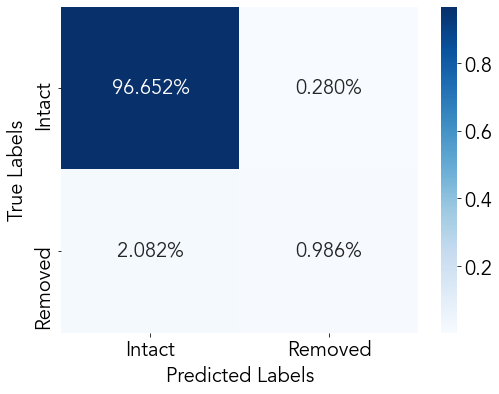

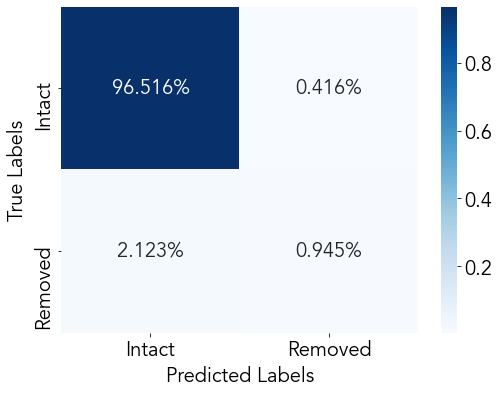

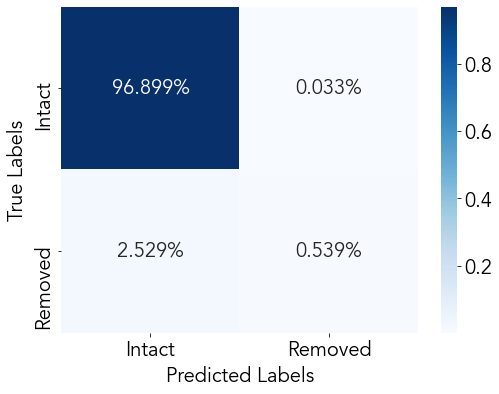

In [208]:
# Predictions
lr_predicted_nontext_bi = base_lr_nontext_bi.predict(x_test)
rf_predicted_nontext_bi = base_rf_nontext_bi.predict(x_test)
gb_predicted_nontext_bi = base_gb_nontext_bi.predict(x_test)

# Confusion matrices
plot_confusion_matrix(y_test, lr_predicted_nontext_bi)
plot_confusion_matrix(y_test, rf_predicted_nontext_bi)
plot_confusion_matrix(y_test, gb_predicted_nontext_bi)

#### Bigrams & Undersampling

In [65]:
# Unigrams & No Undersampling

# Baseline model
d_base_nontext_bi_u,base_nontext_bi_u = cross_val_scores_freq(X_train, y_train, 5, DummyClassifier(strategy="stratified"),2,nontext=True,undersampling=True)

# Logistic Regression
d_lr_nontext_bi_u,base_lr_nontext_bi_u = cross_val_scores_freq(X_train, y_train, 5, LogisticRegression(random_state=0),2,nontext=True,undersampling=True)

# Random Forest
d_rf_nontext_bi_u,base_rf_nontext_bi_u = cross_val_scores_freq(X_train, y_train, 5, RandomForestClassifier(n_estimators=5, random_state=0),2,nontext=True,undersampling=True)

# Gradient Boosting
d_gb_nontext_bi_u,base_gb_nontext_bi_u = cross_val_scores_freq(X_train, y_train, 5, GradientBoostingClassifier(n_estimators=5, random_state=0),2,nontext=True,undersampling=True)


In [270]:
# weighted average F1 scores
f1_base_nontext_bi_u = d_base_nontext_bi_u['f1_w']
f1_lr_nontext_bi_u = d_lr_nontext_bi_u['f1_w']
f1_rf_nontext_bi_u = d_rf_nontext_bi_u['f1_w']
f1_gb_nontext_bi_u = d_gb_nontext_bi_u['f1_w']

print(f'Weighted Average F1 Scores Nontext: Bigrams & Undersampling')
print(f'Baseline: {f1_base_nontext_bi_u:.4f}')
print(f'Logistic Regression: {f1_lr_nontext_bi_u:.4f}')
print(f'Random Forest: {f1_rf_nontext_bi_u:.4f}')
print(f'Gradient Boosting: {f1_gb_nontext_bi_u:.4f}')

Weighted Average F1 Scores Nontext: Bigrams & Undersampling
Baseline: 0.6414
Logistic Regression: 0.9199
Random Forest: 0.8367
Gradient Boosting: 0.9328


In [271]:
# weighted average precision scores
precision_base_nontext_bi_u = d_base_nontext_bi_u['precision_w']
precision_lr_nontext_bi_u = d_lr_nontext_bi_u['precision_w']
precision_rf_nontext_bi_u = d_rf_nontext_bi_u['precision_w']
precision_gb_nontext_bi_u = d_gb_nontext_bi_u['precision_w']

print(f'Weighted Average precision Scores Nontext: Bigrams & Undersampling')
print(f'Baseline: {precision_base_nontext_bi_u:.4f}')
print(f'Logistic Regression: {precision_lr_nontext_bi_u:.4f}')
print(f'Random Forest: {precision_rf_nontext_bi_u:.4f}')
print(f'Gradient Boosting: {precision_gb_nontext_bi_u:.4f}')

Weighted Average precision Scores Nontext: Bigrams & Undersampling
Baseline: 0.9404
Logistic Regression: 0.9653
Random Forest: 0.9606
Gradient Boosting: 0.9594


In [273]:
# weighted average recall scores
recall_base_nontext_bi_u = d_base_nontext_bi_u['recall_w']
recall_lr_nontext_bi_u = d_lr_nontext_bi_u['recall_w']
recall_rf_nontext_bi_u = d_rf_nontext_bi_u['recall_w']
recall_gb_nontext_bi_u = d_gb_nontext_bi_u['recall_w']

print(f'Weighted Average recall Scores Nontext: Bigrams & Undersampling')
print(f'Baseline: {recall_base_nontext_bi_u:.4f}')
print(f'Logistic Regression: {recall_lr_nontext_bi_u:.4f}')
print(f'Random Forest: {recall_rf_nontext_bi_u:.4f}')
print(f'Gradient Boosting: {recall_gb_nontext_bi_u:.4f}')

Weighted Average recall Scores Nontext: Bigrams & Undersampling
Baseline: 0.5001
Logistic Regression: 0.8893
Random Forest: 0.7572
Gradient Boosting: 0.9130


In [272]:
# F1 scores for the positive class
f1_base_nontext_bi_u_pos = d_base_nontext_bi_u['f1_pos']
f1_lr_nontext_bi_u_pos = d_lr_nontext_bi_u['f1_pos']
f1_rf_nontext_bi_u_pos = d_rf_nontext_bi_u['f1_pos']
f1_gb_nontext_bi_u_pos = d_gb_nontext_bi_u['f1_pos']

print(f'F1 Scores for the Positive Class Nontext: Bigrams & Undersampling')
print(f'Baseline: {f1_base_nontext_bi_u_pos:.4f}')
print(f'Logistic Regression: {f1_lr_nontext_bi_u_pos:.4f}')
print(f'Random Forest: {f1_rf_nontext_bi_u_pos:.4f}')
print(f'Gradient Boosting: {f1_gb_nontext_bi_u_pos:.4f}')

F1 Scores for the Positive Class Nontext: Bigrams & Undersampling
Baseline: 0.0576
Logistic Regression: 0.2858
Random Forest: 0.1532
Gradient Boosting: 0.2708


In [348]:
f1_list_nontext_bi_u = [f1_base_nontext_bi_u, f1_lr_nontext_bi_u, f1_rf_nontext_bi_u, f1_gb_nontext_bi_u]
precision_list_nontext_bi_u = [precision_base_nontext_bi_u, precision_lr_nontext_bi_u, precision_rf_nontext_bi_u, precision_gb_nontext_bi_u]
recall_list_nontext_bi_u = [recall_base_nontext_bi_u, recall_lr_nontext_bi_u, recall_rf_nontext_bi_u, recall_gb_nontext_bi_u]

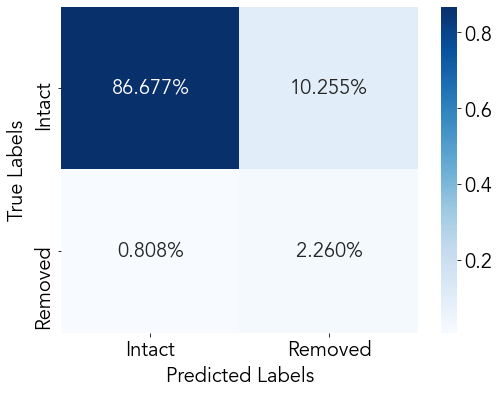

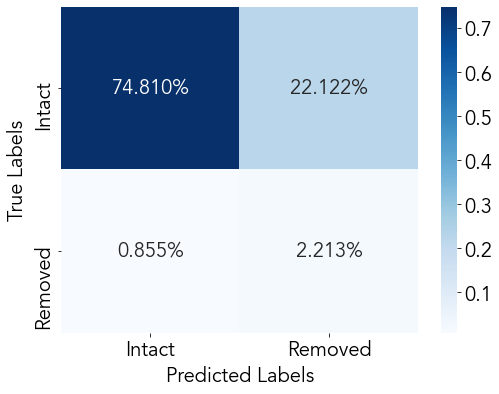

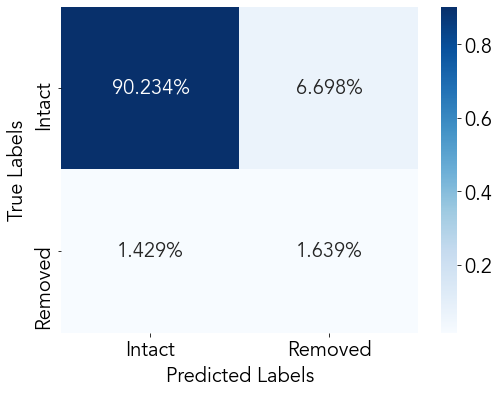

In [214]:
# Predictions
lr_predicted_nontext_bi_u = base_lr_nontext_bi_u.predict(x_test)
rf_predicted_nontext_bi_u = base_rf_nontext_bi_u.predict(x_test)
gb_predicted_nontext_bi_u = base_gb_nontext_bi_u.predict(x_test)

# Confusion matrices
plot_confusion_matrix(y_test, lr_predicted_nontext_bi_u)
plot_confusion_matrix(y_test, rf_predicted_nontext_bi_u)
plot_confusion_matrix(y_test, gb_predicted_nontext_bi_u)

### Modeling Results: Text & Non-text Features

As we see above, the model that yields the highest weighted F1 score using non-textual features is Logistic Regression using unigrams and no undersampling, with an F1 score of 0.9711, precision of 0.9722, and recall of 0.9760. This is an improvement of 0.01 compared to the best model (Random Forest using bigrams and no undersampling) using only textual features. The F1 score for the positive (removed comments) class is 0.4442, an improvement of 0.24 compared to the models without textual features.

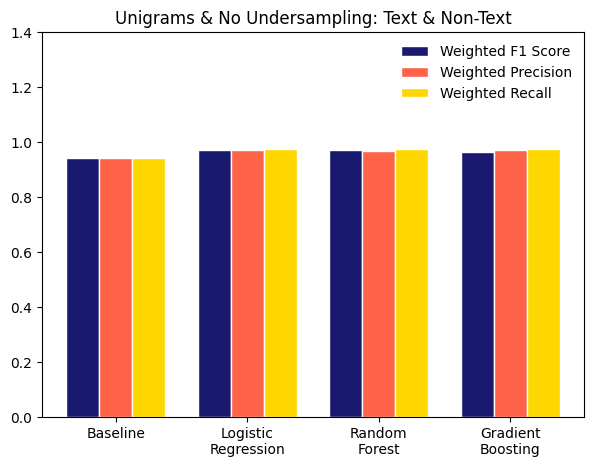

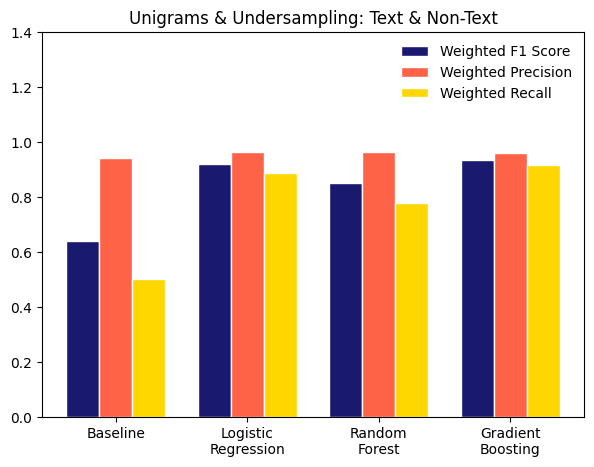

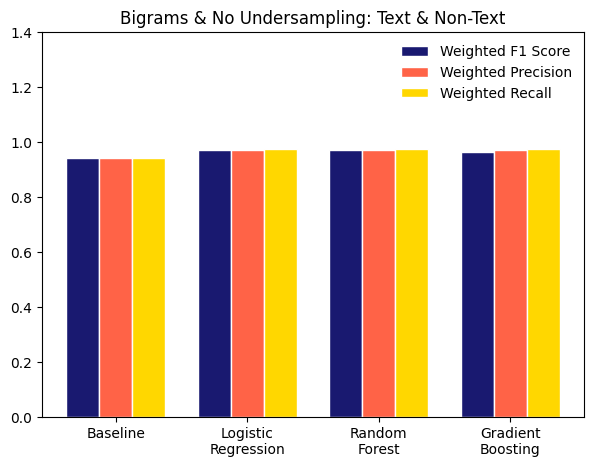

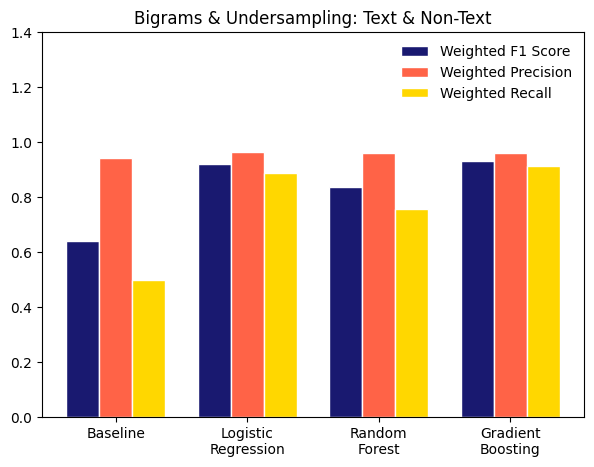

In [357]:
plot_results(0.25, f1_list_nontext, precision_list_nontext, recall_list_nontext, "Unigrams & No Undersampling: Text & Non-Text")
plot_results(0.25, f1_list_nontext_u, precision_list_nontext_u, recall_list_nontext_u, "Unigrams & Undersampling: Text & Non-Text")
plot_results(0.25, f1_list_nontext_bi, precision_list_nontext_bi, recall_list_nontext_bi, "Bigrams & No Undersampling: Text & Non-Text")
plot_results(0.25, f1_list_nontext_bi_u, precision_list_nontext_bi_u, recall_list_nontext_bi_u, "Bigrams & Undersampling: Text & Non-Text")

